# UROP prelim model

In [5]:
import numpy as np
import pandas as pd
import csv

# imports for plotting
import seaborn as sn
import matplotlib.pyplot as plt

# imports for PCA
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# for generating training / validation / test datasets
from random import sample

In [8]:
# Load in data from csv file
path = "/Users/jbel/UROP_transportation/segment_travel_times.csv"
segment_travel_data = pd.read_csv(path)
print(segment_travel_data)

            Date       Hour  80W: 15.917-15.577  80W: 15.577-14.838  \
0     2015-01-05  7:00-8:00                 NaN            0.859025   
1     2015-01-06  7:00-8:00                 NaN            0.896865   
2     2015-01-07  7:00-8:00                 NaN            0.767312   
3     2015-01-08  7:00-8:00                 NaN            1.098431   
4     2015-01-09  7:00-8:00                 NaN            1.036587   
...          ...        ...                 ...                 ...   
1297  2019-12-25  7:00-8:00                 NaN            0.643983   
1298  2019-12-26  7:00-8:00                 NaN            0.686968   
1299  2019-12-27  7:00-8:00                 NaN            0.712575   
1300  2019-12-30  7:00-8:00                 NaN            0.738248   
1301  2019-12-31  7:00-8:00                 NaN            0.708118   

      80W: 14.838-14.58  80W: 14.58-14.137  80W: 14.137-13.789  \
0                   NaN           0.598798            0.516938   
1              

In [16]:
highways = [col for col in segment_travel_data.columns][2:]
print(highways)

['80W: 15.917-15.577', '80W: 15.577-14.838', '80W: 14.838-14.58', '80W: 14.58-14.137', '80W: 14.137-13.789', '80W: 13.789-13.434', '80W: 13.434-13.129', '80W: 13.129-12.619', '80W: 12.619-12.39', '80W: 12.39-12.216', '80W: 12.216-11.655', '80W: 11.655-11.338', '80W: 11.338-11.049', '80W: 11.049-10.121', '80W: 10.121-9.637', '80W: 9.637-9.404', '80W: 9.404-9.162', '80W: 9.162-9.025', '80W: 9.025-8.759', '80W: 8.759-8.633', '80W: 8.633-8.331', '80W: 8.331-8.068', '80W: 8.068-7.83', '80W: 7.83-7.498', '80W: 7.498-7.104', '80W: 7.104-2.072', '4W: 28.515-27.8', '4W: 27.8-27.304', '4W: 27.304-26.905', '4W: 26.905-26.424', '4W: 26.424-25.854', '4W: 25.854-25.534', '4W: 25.534-24.214', '4W: 24.214-23.799', '4W: 23.799-23.543', '4W: 23.543-22.539', '4W: 22.539-20.125', '4W: 20.125-19.689', '4W: 19.689-18.866', '4W: 18.866-18.56', '4W: 18.56-18.304', '4W: 18.304-17.029', '4W: 17.029-16.442', '4W: 16.442-15.513', '4W: 15.513-15.246', '242S: 3.366-2.895', '242S: 2.895-2.647', '242S: 2.647-2.266', 

## Descriptive Statistical Analysis

In [9]:
# Get the descriptive summary statistics of the data
print(segment_travel_data.describe())

       80W: 15.917-15.577  80W: 15.577-14.838  80W: 14.838-14.58  \
count                 0.0         1302.000000                0.0   
mean                  NaN            1.180474                NaN   
std                   NaN            0.305253                NaN   
min                   NaN            0.565421                NaN   
25%                   NaN            0.958415                NaN   
50%                   NaN            1.184506                NaN   
75%                   NaN            1.350200                NaN   
max                   NaN            2.623669                NaN   

       80W: 14.58-14.137  80W: 14.137-13.789  80W: 13.789-13.434  \
count        1302.000000         1302.000000         1302.000000   
mean            0.959580            0.743965            0.782490   
std             0.382443            0.284343            0.370779   
min             0.343005            0.265452            0.274278   
25%             0.710775            0.601730   

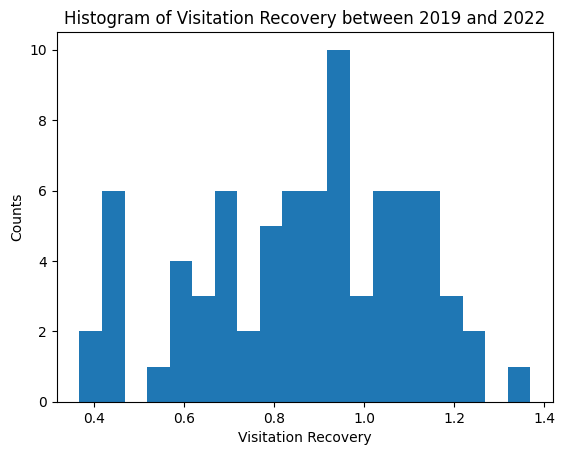

In [144]:
# Plot a histogram of vistation_recovery (variable of interest)
plt.hist(visitation_data['visitation_recovery'], bins=20)
plt.xlabel('Visitation Recovery')
plt.ylabel('Counts')
plt.title('Histogram of Visitation Recovery between 2019 and 2022')
plt.show()

In [12]:
def avgs_bar_graph(columns, xlabel, plot_title):
    """Generates a bar graph of the means for the columns specified by columns.
    Input: columns (list of strings), xlabel (string), plot_title (string)
    Output: Displays bar graph plot"""
    columns_data = visitation_data[columns]
    column_means = columns_data.mean()
    column_means.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel('average traffic flows')
    plt.title(plot_title)
    plt.show()

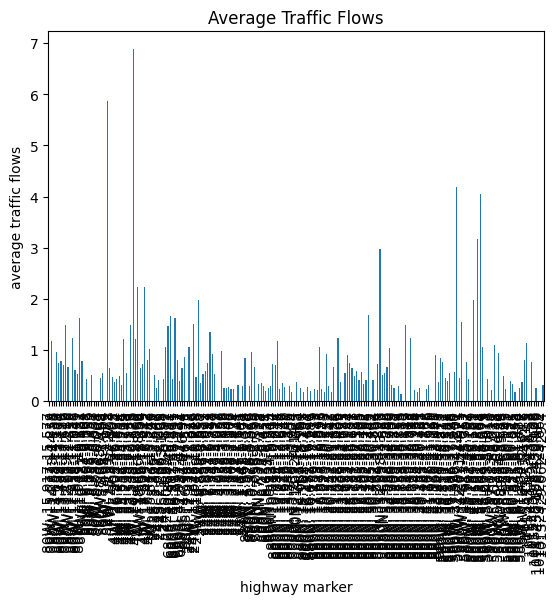

In [17]:
avgs_bar_graph(highways, 'highway marker', 'Average Traffic Flows')

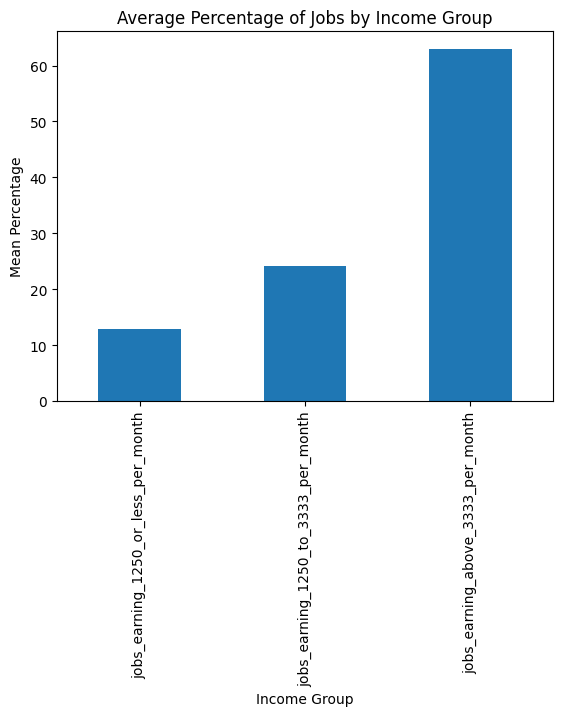

In [147]:
income_columns = ['jobs_earning_1250_or_less_per_month','jobs_earning_1250_to_3333_per_month','jobs_earning_above_3333_per_month']
avgs_bar_graph(income_columns, 'Income Group', 'Average Percentage of Jobs by Income Group')

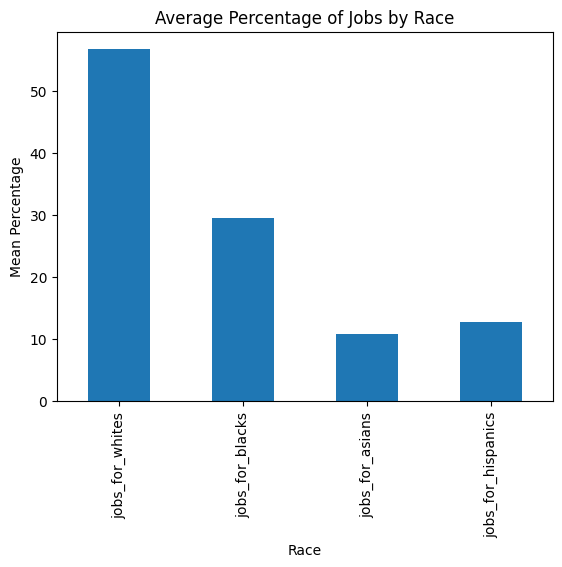

In [148]:
job_race_columns = ['jobs_for_whites','jobs_for_blacks','jobs_for_asians','jobs_for_hispanics']
avgs_bar_graph(job_race_columns, 'Race', 'Average Percentage of Jobs by Race')

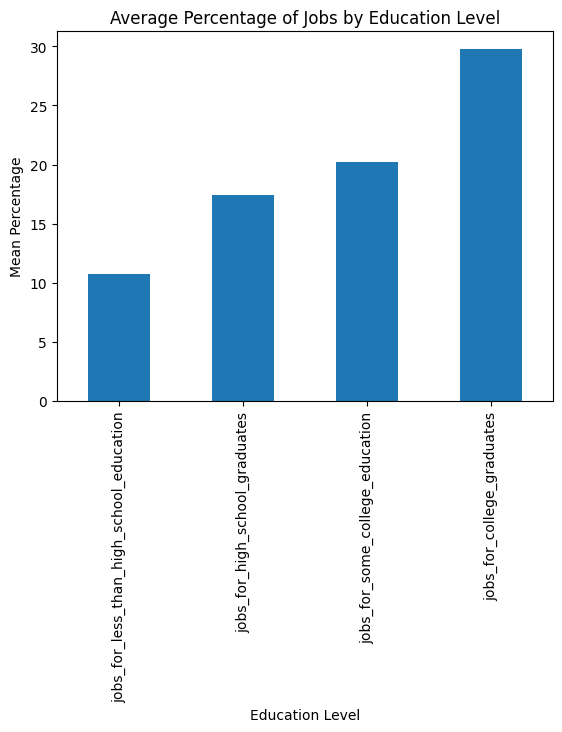

In [149]:
jobs_ed_columns = ['jobs_for_less_than_high_school_education', 'jobs_for_high_school_graduates', 'jobs_for_some_college_education', 'jobs_for_college_graduates']
avgs_bar_graph(jobs_ed_columns, 'Education Level', 'Average Percentage of Jobs by Education Level')

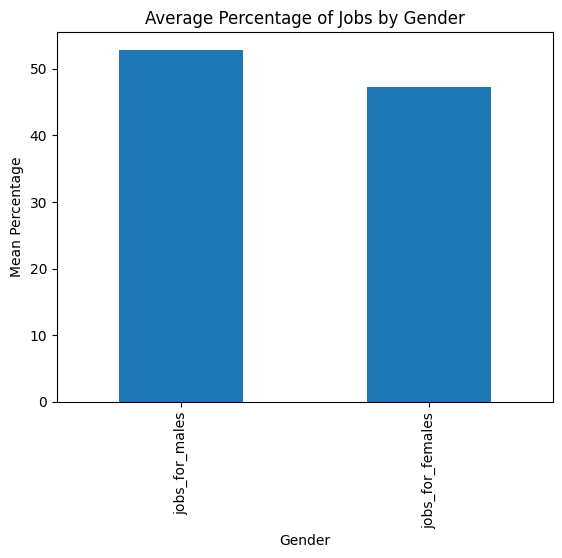

In [150]:
jobs_gender_columns = ['jobs_for_males','jobs_for_females']
avgs_bar_graph(jobs_gender_columns, 'Gender', 'Average Percentage of Jobs by Gender')

## Setting up Data

In [10]:
raw_data_array = []

with open(path, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        raw_data_array.append(row)

r, c = len(raw_data_array), len(raw_data_array[0])
print(r,c)
print(raw_data_array)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [138]:
data_full = np.array(raw_data_array)
x_data_string = data_full[1:, 6:]
y_data_string = data_full[1:, 5:6]
x_full = x_data_string.astype(np.float64)
y_full = y_data_string.astype(np.float64)

# print(f'x_full = {x_full}')
# print(f'shape = {x_full.shape}')
# print()
# print(f'y_full = {y_full}')
# print(f'shape = {y_full.shape}')

x_full = [[7.51200000e+03 7.56938292e+00 3.99361000e-02 ... 3.66051378e+01
  1.17769815e+01 6.23656011e+00]
 [3.90700000e+03 1.96782496e+00 0.00000000e+00 ... 3.60648928e+01
  1.24047008e+01 3.79698229e+00]
 [9.14000000e+03 4.18865822e+00 0.00000000e+00 ... 3.70745381e+01
  1.27961771e+01 9.65169127e+00]
 ...
 [5.98000000e+02 1.53957325e+00 0.00000000e+00 ... 3.86163147e+01
  1.22899383e+01 5.29105225e+00]
 [4.06200000e+03 1.35290128e+01 0.00000000e+00 ... 3.78887862e+01
  1.21933010e+01 9.67922122e+00]
 [9.04900000e+03 4.12112932e+00 0.00000000e+00 ... 3.50457531e+01
  1.36282302e+01 1.12457439e+01]]
shape = (78, 40)

y_full = [[0.92129656]
 [0.39640266]
 [1.2539929 ]
 [1.21968743]
 [0.78337306]
 [1.12729296]
 [0.87930951]
 [0.9231354 ]
 [1.07159561]
 [0.58362555]
 [0.83923185]
 [0.69546371]
 [0.74552268]
 [1.11762294]
 [1.10808686]
 [1.15207474]
 [0.90084867]
 [0.67244622]
 [0.68899324]
 [1.07185374]
 [0.77773624]
 [0.43396209]
 [0.66476204]
 [1.11488762]
 [1.1287109 ]
 [0.60576548]


In [189]:
from sklearn.preprocessing import StandardScaler

def normalize(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

x_full_normalized = normalize(x_full)
y_full_normalized = normalize(y_full)

# print(x_full_normalized)

[[-0.38766999 -0.37412716  2.84360416 ... -0.21450318 -0.57786598
  -0.45960411]
 [-0.49577408 -0.53768861 -0.41811    ... -0.45253662 -0.12620282
  -0.86034402]
 [-0.33885072 -0.47284188 -0.41811    ... -0.00768411  0.15547631
   0.10138613]
 ...
 [-0.59500195 -0.55019325 -0.41811    ...  0.67162693 -0.20877793
  -0.61491899]
 [-0.49112606 -0.20011026 -0.41811    ...  0.35107586 -0.27831141
   0.10590836]
 [-0.34157956 -0.47481368 -0.41811    ... -0.90157239  0.75416386
   0.36323492]]


In [190]:
# SETTING UP TRAINING/VALIDATION/TESTING DATA (70/20/10 split)

indices = {i for i in range(78)}
train_set = set(sample(indices, 54))
val_set = set(sample(indices - train_set, 16))
test_set = indices - train_set - val_set

train_indices = sorted(list(train_set))
val_indices = sorted(list(val_set))
test_indices = sorted(list(test_set))

# print(test_indices)

x_train = [x_full_normalized.tolist()[i] for i in train_indices]
x_validate = [x_full_normalized.tolist()[i] for i in val_indices]
x_test = [x_full_normalized.tolist()[i] for i in test_indices]

y_train = [y_full_normalized.tolist()[i][0] for i in train_indices]
y_validate = [y_full_normalized.tolist()[i][0] for i in val_indices]
y_test = [y_full_normalized.tolist()[i][0] for i in test_indices]

# print(x_test)
# print()
# print(y_test)

/var/folders/y2/k5jc87z171g2wkfq14bm1zlh0000gn/T/ipykernel_51966/761831466.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_set = set(sample(indices, 54))
/var/folders/y2/k5jc87z171g2wkfq14bm1zlh0000gn/T/ipykernel_51966/761831466.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  val_set = set(sample(indices - train_set, 16))


In [191]:
# Performing PCA to determine which components carry most information (variance) in the data

# Perform PCA
pca = PCA(n_components=2)
x_data_pca = pca.fit_transform(x_full_normalized)

# Print the principal components
components = pca.components_
print(f"Principal components: \n{components}") 
# 2 eigenvectors of covariance matrix with highest eigenvalues

Principal components: 
[[ 0.16006118  0.18948984 -0.00385211 -0.03207642 -0.09634426 -0.19032563
  -0.10408073 -0.16311323 -0.12437817 -0.09066276  0.06176539  0.08295477
  -0.08951325  0.19946564 -0.01938335  0.00714639 -0.02803922 -0.09214294
   0.18340699  0.10025869 -0.14840394  0.18608713  0.00881479 -0.16987844
  -0.27423213  0.25366358  0.11639799 -0.15240663  0.12989769 -0.23801004
  -0.28471475 -0.23818158 -0.15844911  0.32089624 -0.15521283  0.15521283
   0.1858311   0.04485883 -0.16832342 -0.06736243]
 [-0.06068285 -0.01669731 -0.12644161 -0.10012615  0.04691446 -0.24852242
  -0.20848497 -0.23292009  0.13951755 -0.10219542 -0.03267554 -0.00297927
   0.07370105 -0.04892546  0.120501    0.0451851   0.16577335  0.26495449
  -0.03946793 -0.07016599  0.30537886 -0.29560042 -0.13912469  0.30816728
   0.11979348 -0.23610205 -0.04239208 -0.02576368  0.14235945 -0.04347796
  -0.12618796 -0.19151517 -0.1763032  -0.0419076  -0.26849571  0.26849571
   0.00381607  0.16123955 -0.04604842 

## Training Neural Net 

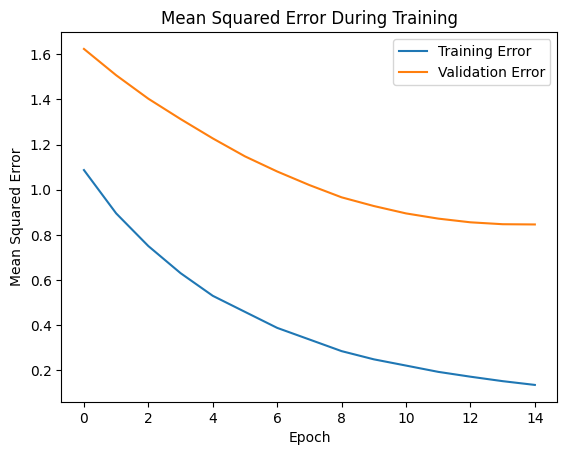

In [212]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(40,)),
    keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_validate, y_validate), verbose=0)

# Plot MSE over the course of training
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training Error', 'Validation Error'], loc='upper right')
plt.ticklabel_format(style='plain')
plt.show()


In [213]:
test_loss = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 39ms/step - loss: 0.2374 - mean_squared_error: 0.2374


In [226]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=0)

# Get the feature importances sorted by the magnitude of their scores
sorted_idx = list(result.importances_mean.argsort())
print(sorted_idx)

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step
[35, 1, 34, 7, 14, 32, 30, 29, 8, 26, 36, 22, 17, 5, 24, 16, 9, 25, 3, 6, 12, 15, 2, 20, 0, 37, 23, 13, 38, 19, 11, 21, 33, 18, 4, 28, 10, 39, 27, 31]


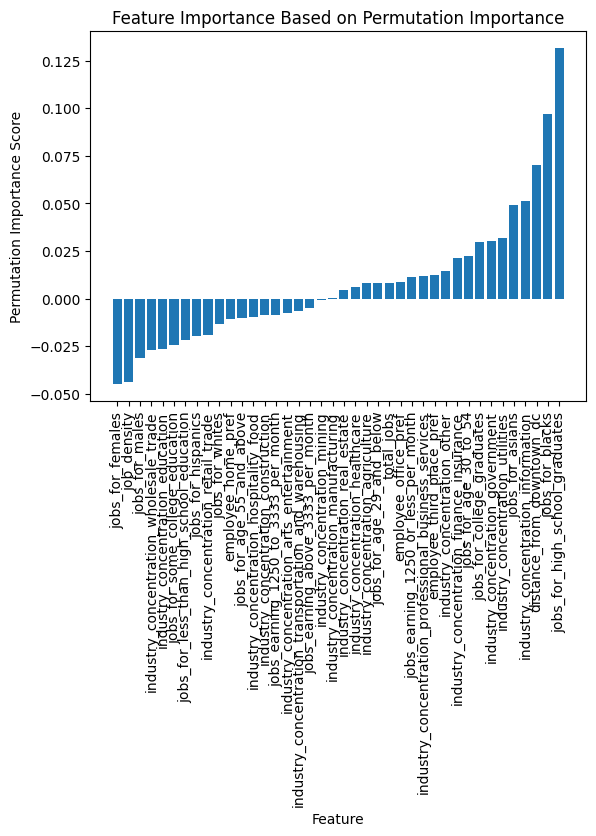

In [227]:
feature_labels = [raw_data_array[0][i + 6] for i in sorted_idx]
plt.bar(feature_labels, result.importances_mean[sorted_index])
plt.title('Feature Importance Based on Permutation Importance')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance Score')
plt.xticks(rotation=90)
plt.show()

In [218]:
# sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',